# （2）分析赞助金额信息 

In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

In [2]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')

C:\Users\JM005172\AppData\Local\Programs\Anaconda18.12\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

利用cut函数将所有的赞助金划分到不同的区间，并展示 Obama, Barack 和 Romney, Mitt 赞助金的获得情况。

In [4]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
              ...      
701376    (1000, 10000]
701377        (10, 100]
701378        (10, 100]
701379      (100, 1000]
701380    (1000, 10000]
701381        (10, 100]
701382      (100, 1000]
701383          (1, 10]
701384        (10, 100]
701385      (100, 1000]
Name: contb_receipt_amt, Length: 700975, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [5]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


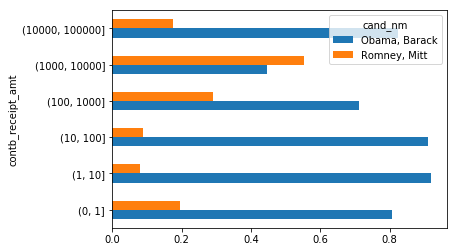

In [6]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums
normed_sums[:-2].plot(kind='barh')

# （3）分析Obama,	Barack 和 Romney,	Mitt的赞助者所在州信息（聚合）

In [7]:
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [8]:
totals = totals[totals.sum(1)>100000]
totals[:20]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,275353.15,86204.24
AL,537835.48,504882.08
AR,324802.28,105351.50
AZ,1484241.84,1850484.23
CA,23370680.84,10908232.46
CO,2104551.38,1477810.82
CT,2037216.66,3377421.85
DC,4317865.85,999740.50
DE,325394.14,81404.00


上表得出按金额排前20 的州赞助情况，使用div函数计算各州的总赞助额比例为：

In [9]:
percent = totals.div(totals.sum(1),axis = 0)
percent[:20]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.761575,0.238425
AL,0.515802,0.484198
AR,0.755084,0.244916
AZ,0.445087,0.554913
CA,0.681780,0.318220
CO,0.587476,0.412524
CT,0.376242,0.623758
DC,0.811994,0.188006
DE,0.799891,0.200109
